# E-Commerce Case Study
In today's digital era, business paradigms and customer interactions have been transformed significantly. E-commerce, as a product of this digital transformation, has revolutionized the way companies operate. With an increasing number of consumers shifting to online shopping, businesses are in a race to harness the potential of e-commerce to gain a competitive edge and drive growth.

One of the key strengths of e-commerce is its ability to gather vast amounts of data regarding customer behaviors and transactions. This has opened up new opportunities to gain a deeper understanding of consumer preferences and align products and services more closely with their needs.

**About Dataset:**

Contains orders from an E-commerce site (UK Retailer), with various products and orders. Try starting with EDA and applying different functions to know more about the data. The dataset is tricky as it contains all the problems that an actual site may have. The dataset can be found [here](https://www.kaggle.com/datasets/atharvaarya25/e-commerce-analysis-uk/data).

Some hints to know what problems the dataset has:

* Contains duplicates!! Check for it and remove them
* Contains missing values
* Has negative unit price, try to guess what could be the reason
* Has negative quantity, try to guess what could be the reason
* Apply a prescriptive analysis approach to data and find ways to increase sales. This is an interesting task that builds up skills like business Intelligence.

In this data analysis project, we will delve deeper into the captivating world of e-commerce analysis. Through a series of crucial techniques such as data cleaning, exploratory data analysis (EDA) visualizations, and customer segmentation using the RFM (Recency, Frequency, Monetary) approach, we will conclude the project by revealing valuable insights into customer behavior.

In [1]:
#Importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Lets have a look at head of the dataset to get an idea of what it looks like.
df = pd.read_csv("C:\\Users\\Diva Azzahra\\Downloads\\E-commerce(UK).csv",encoding = "ISO-8859-1")
print(df.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  


### A. Data Wrangling
**1. Check for Data Types**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


Summary:
- The dtype of InvoiceDate should be changed from object to DateTime
- Quantity and unit price should be changed from object to numeric
- The CustomerID is unique to a customer, so we can't consider them as float64, so changed them as object.

**2. Changing to the proper datatype of some columns**

In [4]:
# 1. Switch data type of InvoiceDate
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [5]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [6]:
# 2. Switch data type of CustomerID
df = df.astype({'CustomerID':object})

In [7]:
df.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

In [8]:
# 3. Switch data type of Quantity
df['Quantity'] = pd.to_numeric(df['Quantity'])

#4. Switch data type of UnitPrice
df['UnitPrice'] = pd.to_numeric(df['UnitPrice'])

In [9]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID             object
Country                object
dtype: object

**3. Statistics of numeric columns**

In [10]:
df.describe()

,Quantity,InvoiceDate,UnitPrice
count,541909.000000,541909,541909.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114
min,-80995.000000,2010-12-01 08:26:00,-11062.060000
25%,1.000000,2011-03-28 11:34:00,1.250000
50%,3.000000,2011-07-19 17:17:00,2.080000
75%,10.000000,2011-10-19 11:27:00,4.130000
max,80995.000000,2011-12-09 12:50:00,38970.000000
std,218.081158,NaN,96.759853


As we can see, both the 'Quantity' and 'UnitPrice' columns have negative values, which could cause errors. We need to handle and rectify these mistakes by validating and cleansing the data to ensure reliable and accurate analysis.

**4. Checking dataset dimensions**

In [11]:
df.shape

(541909, 8)

## B. Data Cleaning
**1. Checking for duplicates**

In [12]:
#checking for duplicates
df.duplicated().sum()

5268

In [13]:
#eliminating for duplicated rows
df = df.drop_duplicates()

In [14]:
#double check 
df.duplicated().sum()

0

**2. Checking for missing values**

In [15]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

In [16]:
# Step 1: Calculate the most frequent description for each stockcode
grouped_description = df.groupby('StockCode')['Description'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None).reset_index()

# Step 2: Create a mapping dictionary with NaN values handled as well
mapping_dict = dict(zip(grouped_description['StockCode'], grouped_description['Description']))

# Step 3: Fill missing descriptions based on the mapping dictionary
df['Description'] = df['StockCode'].map(mapping_dict).combine_first(df['Description'])

In [17]:
#double check
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description       112
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

In [18]:
# We want to know the percentage of missing value in CustomerID and Description
135037/len(df)

0.2516337737891812

In [19]:
112/len(df)

0.00020870563374770097

Summary:
- The percentage of missing value in CustomerID is more than 24.9%.
- Since CustomerID cannot be filled using imputation methods we are going to fill the columns.
- The percentage of missing values in Description is less than 2% we have to impute the values.
- The values are filled based on the relation between stockcode and description.
- After imputing there are few values which were not filled because there are no decription for the specific stockcode. Since there are only 0.2% we can fill those columns with "others" string value and also fill CustomerID.

**2. Filling those misssing values**

In [20]:
df['Description'] = df['Description'].fillna("Others")
df['CustomerID'] = df['CustomerID'].fillna("Unknown")

## C. Filtering & creating several columns
**1. Create columns**

In [21]:
#Creating a separate column for year
df['Year'] = df['InvoiceDate'].dt.year

#creating a column for Month
df['Month']= df['InvoiceDate'].dt.month

# Creating column for day 
df['Day']= df['InvoiceDate'].dt.day

# Creating column for hour
df['Hour'] = df['InvoiceDate'].dt.hour

df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,1,8


In [22]:
#creating a column for total
df['Total of Sales'] = df['Quantity']*df['UnitPrice']

In [23]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,Hour,Total of Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1,8,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,1,8,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,20.34


**2. Structuring / Filtering**

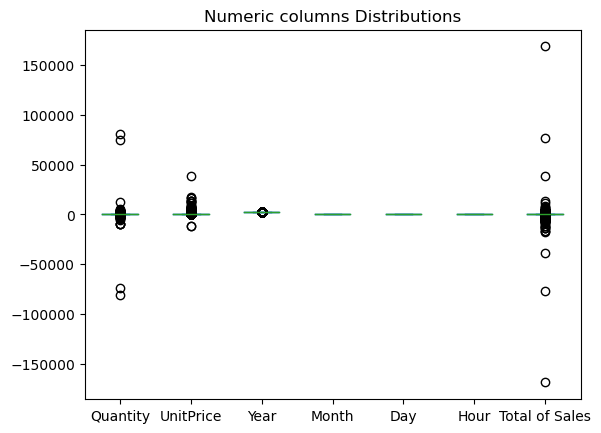

In [24]:
#Check Unit Price `s Distribution
df.plot(kind='box')
plt.title('Numeric columns Distributions')
plt.show()

As we can the above box plot, 'Quantity', 'Unit Price' and 'Sales' show nagetive values. Potential reasons for negative values in these columns could be data entry errors, misinterpretation of data or cancelations.

In [25]:
#Checking those rows with negative values in 'Unitprice' column 
df[df['UnitPrice']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,Hour,Total of Sales
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,Unknown,United Kingdom,2011,8,12,14,-11062.06
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,Unknown,United Kingdom,2011,8,12,14,-11062.06


In [26]:
#Checking if there's more rows with 'debt' word in their description 
df[df['Description'].str.contains('debt|DEBT')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,Hour,Total of Sales
299982,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,Unknown,United Kingdom,2011,8,12,14,11062.06
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,Unknown,United Kingdom,2011,8,12,14,-11062.06
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,Unknown,United Kingdom,2011,8,12,14,-11062.06


In [27]:
# Filtering out those rows 
df = df[~df['Description'].str.contains('debt|DEBT')]

In [28]:
# Filtering out rows where their 'UnitPrice' is less than 0 
df = df[df['UnitPrice']>0]

In [29]:
# Checking minimin 'UnitPrice'
df['UnitPrice'].min()

0.001

In [30]:
# Checking those rows where the 'Quantity' is less than 0 
df[df['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,Hour,Total of Sales
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,2010,12,1,9,-27.50
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,2010,12,1,9,-4.65
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,2010,12,1,10,-19.80
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,2010,12,1,10,-6.96
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,2010,12,1,10,-6.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,2011,12,9,9,-9.13
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,2011,12,9,10,-224.69
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,2011,12,9,11,-54.75
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,2011,12,9,11,-1.25


Most of the cases, negative quantities might represent returns or refunds of previously purchased items. When a customer returns an item, it may be recorded as a negative quantity in the sales data.

In [31]:
# Filetring out those rows 
df = df[df['Quantity']>0]

In [32]:
# Checking the minimum 'Quantity'
df['Quantity'].min()

1

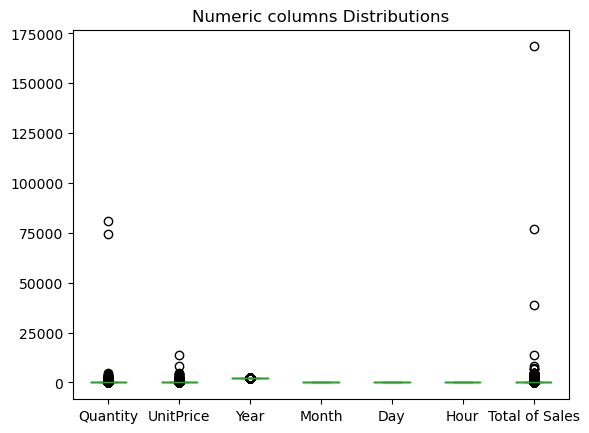

In [33]:
# Let's visualize again numeric values distribution
df.plot(kind='box')
plt.title('Numeric columns Distributions')
plt.show()

With negative values eliminated, we can now analyze the data. However, before delving into the comprehensive analysis, it is prudent to examine any potential extreme values that might exist.

In [34]:
#Checking Extreme Values 
df[df['Quantity']>10000]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,Hour,Total of Sales
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,2011,1,18,10,77183.6
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom,2011,12,9,9,168469.6


It seems that there are two extreme purchases in the data. After careful evaluation, we have concluded that these values don't lead to errors, and as such, we have decided to keep them in the dataset.

# Data Analysis
Our approach includes exploration, visualization, segmentation, and time series.

Let's try to solve the following quesitons:

1.) What product sold the most?
<br>2.) What Products are most often sold together
<br>3.) Which are the countries with the most amount  of customers?
<br>4.) What is the average sales per customer in each country?
<br>5.) Are there any seasonal patterns or trends in sales data over different time periods?
<br>6.) 
what strategies can be applied to effectively segment customers for improved marketing and personalized experiences?

**1.) What product sold the most ?**

In [42]:
# Calculating the total quantity by product 'Descrption'
most_sold = df.groupby(['Description'])['Quantity'].sum().reset_index().sort_values('Quantity', ascending=False).head(5)
most_sold

,Description,Quantity
2238,"PAPER CRAFT , LITTLE BIRDIE",80995
1918,MEDIUM CERAMIC TOP STORAGE JAR,78033
2517,POPCORN HOLDER,56898
3712,WORLD WAR 2 GLIDERS ASSTD DESIGNS,54951
1703,JUMBO BAG RED RETROSPOT,48371


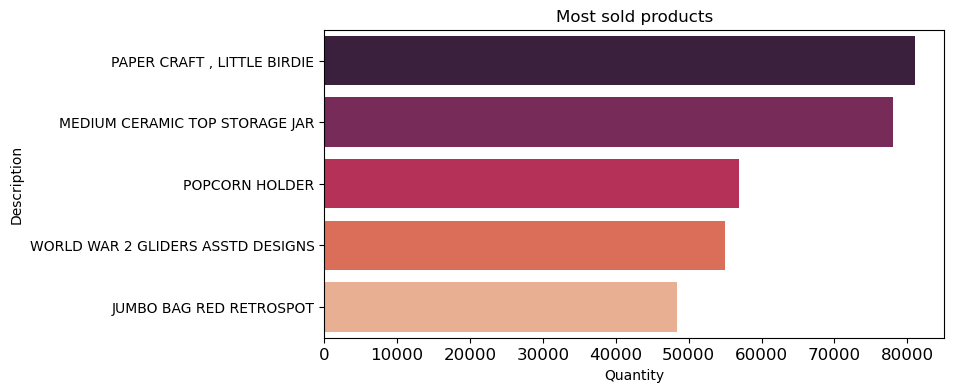

In [43]:
# Visualizing the most sold products
plt.figure(figsize=(8,4))
ax = sns.barplot(data=most_sold, y='Description', x='Quantity', palette='rocket')
plt.title('Most sold products')
plt.xlabel('Quantity')
plt.xticks(fontsize=12)
plt.ylabel('Description')
plt.show()


We can see that these items are sold the most from the company's website, out of them Paper Craft are sold most with approx 81k quantity

**2) What Products are most often sold together ?**

In [44]:
sold_together = df.groupby("InvoiceNo")['Description'].agg(lambda x : " , ".join(x)).reset_index()

In [45]:
sold_together #we got items that are sold together, separated by ","

,InvoiceNo,Description
0,536365,"WHITE HANGING HEART T-LIGHT HOLDER , WHITE MET..."
1,536366,"HAND WARMER UNION JACK , HAND WARMER RED RETRO..."
2,536367,"ASSORTED COLOUR BIRD ORNAMENT , POPPY'S PLAYHO..."
3,536368,"JAM MAKING SET WITH JARS , RED COAT RACK PARIS..."
4,536369,BATH BUILDING BLOCK WORD
...,...,...
19954,581583,"LUNCH BAG RED RETROSPOT , 6 CHOCOLATE LOVE HEA..."
19955,581584,"RED FLOCK LOVE HEART PHOTO FRAME , 6 CHOCOLATE..."
19956,581585,"BLACK TEA TOWEL CLASSIC DESIGN , ASSORTED BOTT..."
19957,581586,"LARGE CAKE STAND HANGING STRAWBERY , SET OF 3..."


In [46]:
from itertools import combinations
from collections import Counter
count = Counter()
for row in sold_together['Description']:
    row_list = row.split(",")
    #item mostly solved together , here it shows 2 items sold together,we can change it to 3
    #to show 3 items sold together and so on ...
    count.update(Counter(combinations(row_list,2)))
#most_common is method from collections
for key,value in count.most_common(10):
    print(key,value)

(' KEY FOB ', ' KEY FOB ') 512
(' KEY FOB ', ' BACK DOOR  ') 487
(' JUMBO BAG PINK POLKADOT ', ' JUMBO BAG RED RETROSPOT ') 477
(' KEY FOB ', ' SHED ') 468
(' GREEN REGENCY TEACUP AND SAUCER ', ' ROSES REGENCY TEACUP AND SAUCER  ') 443
('COFFEE', 'SUGAR ') 432
(' JUMBO SHOPPER VINTAGE RED PAISLEY ', ' JUMBO BAG RED RETROSPOT ') 427
(' SET 3 RETROSPOT TEA', 'COFFEE') 426
(' KEY FOB ', ' FRONT  DOOR  ') 420
(' SET 3 RETROSPOT TEA', 'SUGAR ') 414


Analysis (Pair Products) : we can see that Key Fob are mostly sold with extra pair of Key Fob or with Back Door. And so on...
<br>FeedBack : we can recommend our customer in buying these items while purchasing for one item, this way we can enhance sales.

**3) Which are the countries with the most amount of customers?**

In [47]:
# Calculating amount of customers by country
top_countries = df.groupby(['Country'])['CustomerID'].nunique().reset_index().sort_values('CustomerID', ascending=False).head(10)
top_countries

,Country,CustomerID
36,United Kingdom,3921
14,Germany,94
13,France,88
31,Spain,30
3,Belgium,25
33,Switzerland,22
27,Portugal,20
19,Italy,14
12,Finland,12
1,Austria,11


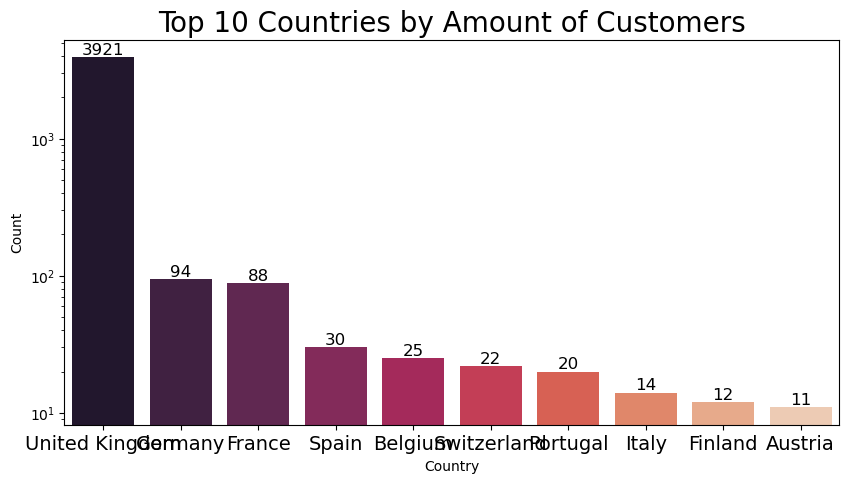

In [48]:
# Visualizing the top 10 countries by amount tof customers 
plt.figure(figsize=(10,5))
ax = sns.barplot(data=top_countries, x= 'Country', y= 'CustomerID', palette='rocket')
plt.title('Top 10 Countries by Amount of Customers', fontsize=20)
ax.bar_label(ax.containers[0], fontsize=12)
plt.ylabel('Count')
plt.xticks(fontsize=14)
plt.yscale('log')
plt.show()

In [49]:
# Calculating average sales per customer by Country
average_sales_country = df.groupby(['Country'])['Total of Sales'].mean().round(2).reset_index().sort_values('Total of Sales', ascending=False).head(10)
average_sales_country

,Country,Total of Sales
24,Netherlands,121.00
0,Australia,117.23
20,Japan,116.56
30,Singapore,95.85
32,Sweden,85.26
16,Hong Kong,55.30
9,Denmark,49.88
22,Lithuania,47.46
2,Bahrain,41.90
21,Lebanon,37.64


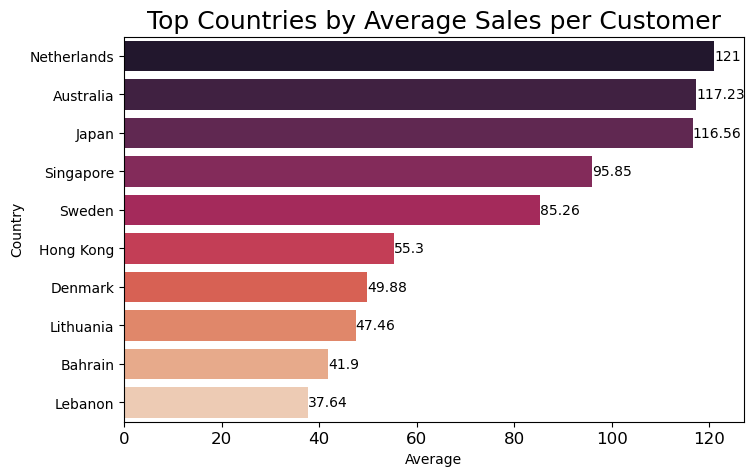

In [50]:
# Visualize Top Countries by their average sales per cusotmer 
plt.figure(figsize=(8,5))
ax = sns.barplot(data = average_sales_country, x= 'Total of Sales', y='Country', palette='rocket')
plt.title('Top Countries by Average Sales per Customer', fontsize=18)
plt.xlabel('Average')
plt.xticks(fontsize=12)
ax.bar_label(ax.containers[0])
plt.show()

In the analysis, we observe that Netherlands, Australia, and Japan stand out with the highest average sales per customer. Surprisingly, although the United Kingdom has the most customers, it does not rank among the top 10 countries in terms of average sales per customer.

This finding highlights the importance of looking at how much customers spend in different countries instead of just counting how many customers there are. It helps us understand which countries are more financially rewarding markets based on how much each customer spends on average.

**5) Are there any seasonal patterns or trends in sales data over different time periods?**
- Let's explore the data by analyzing sales trends based on 'Year', 'Month', 'Day' and 'Time'. By examining these different time frames, we may uncover any patterns or trends that could provide valuable insights.

In [51]:
#Calculating amount of total sales by year
total_sales_year = df.groupby(['Year'])['InvoiceNo'].nunique().reset_index().sort_values('Year', ascending=False).head(10)
total_sales_year

,Year,InvoiceNo
1,2011,18400
0,2010,1559


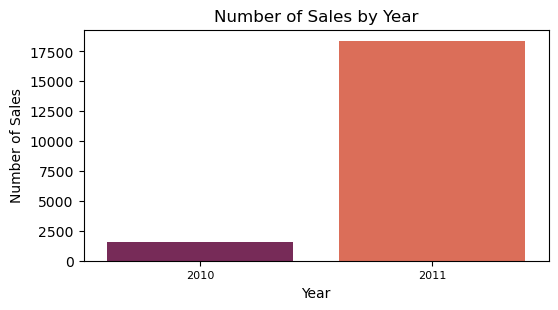

In [52]:
plt.figure(figsize=(6,3))
ax = sns.barplot(data=total_sales_year, x= 'Year', y= 'InvoiceNo', palette='rocket')
plt.title('Number of Sales by Year')
plt.xlabel('Year')
plt.xticks(fontsize=8)
plt.ylabel('Number of Sales')
plt.show()

In [53]:
(18400-1559)/1559

10.802437459910198

In 2011, the total sales reached a significant high, indicating a substantial increase compared to the previous years. The total sales for 2011 were 18400, which is 1080% higher than the total sales in the previous year.

In [55]:
# Calculating the amount of invoce realized by month
invoice_month = df.groupby(['Month'])['InvoiceNo'].nunique().reset_index().sort_values('Month')
invoice_month

,Month,InvoiceNo
0,1,1086
1,2,1100
2,3,1454
3,4,1246
4,5,1681
5,6,1533
6,7,1475
7,8,1360
8,9,1837
9,10,2040


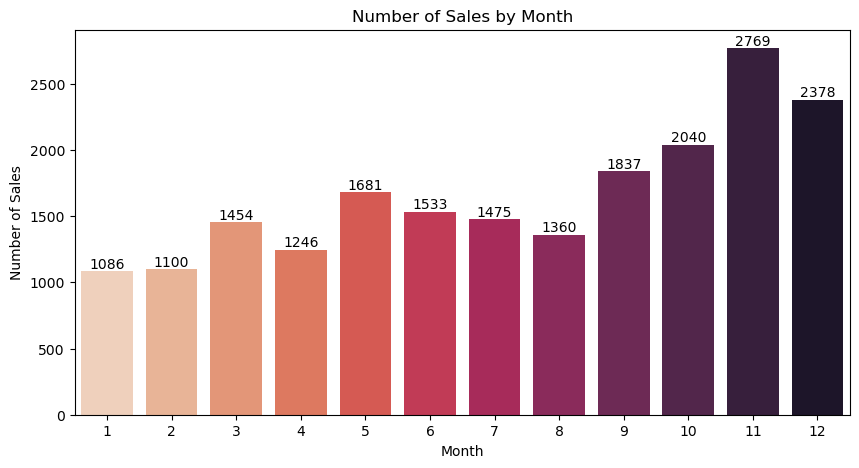

In [56]:
# Visualizing the sales realized by Month
plt.figure(figsize=(10,5))
ax = sns.barplot(data= invoice_month, x='Month', y='InvoiceNo', palette='rocket_r')
plt.title('Number of Sales by Month')
plt.ylabel('Number of Sales')
ax.bar_label(ax.containers[0])
plt.show()

As observed, the sales data reveals a notable increase starting from September, continuing through November, and culminating in a significant decline in December.

This trend could indicate a seasonal upswing in sales during the latter part of the year, likely influenced by factors such as holiday shopping and year-end promotions.

In [57]:
# Calculating the amount of invoce realized by day
invoice_day = df.groupby(['Day'])['InvoiceNo'].nunique().reset_index().sort_values('Day')
invoice_day

,Day,InvoiceNo
0,1,750
1,2,658
2,3,553
3,4,686
4,5,770
5,6,842
6,7,834
7,8,851
8,9,699
9,10,694


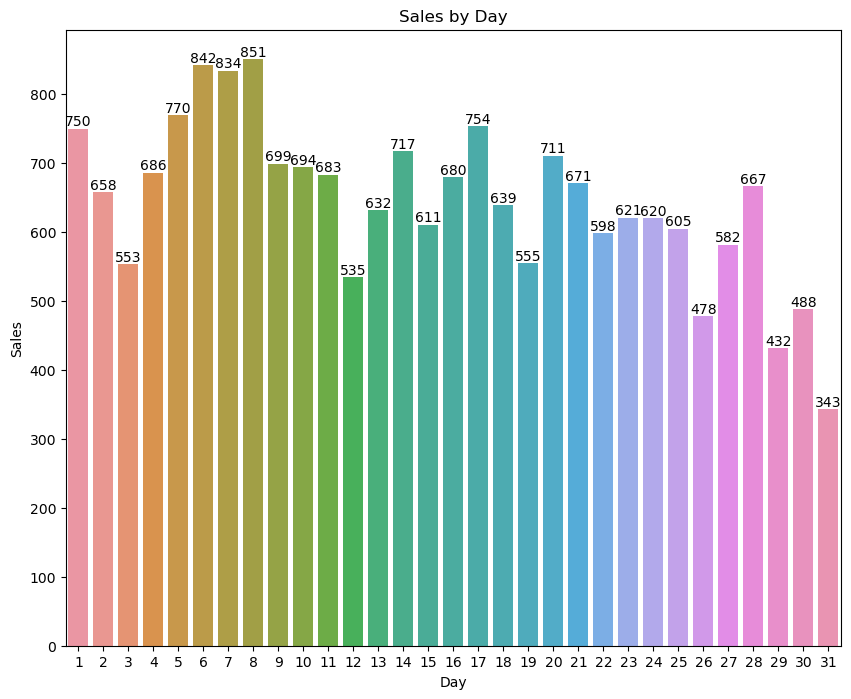

In [58]:
# Visuzlizing the number of sales by Day
plt.figure(figsize=(10,8))
ax = sns.barplot(data= invoice_day, x='Day', y='InvoiceNo')
plt.title('Sales by Day')
ax.bar_label(ax.containers[0])
plt.ylabel('Sales')
plt.show()

As we analyze the data, a notable trend emerges: the highest purchase activity occurs between the 6th, 7th, and 8th of each month. Conversely, towards the end of the month, we observe a decline in purchases.

This pattern indicates that customers tend to be more active in making purchases during the early days of the month, while there is a lull towards the end.

In [59]:
# Calculating the amount of invoce realized by Hour
invoice_hour = df.groupby(['Hour'])['InvoiceNo'].nunique().reset_index().sort_values('Hour')
invoice_hour

,Hour,InvoiceNo
0,6,1
1,7,29
2,8,566
3,9,1484
4,10,2361
5,11,2396
6,12,3220
7,13,2753
8,14,2456
9,15,2336


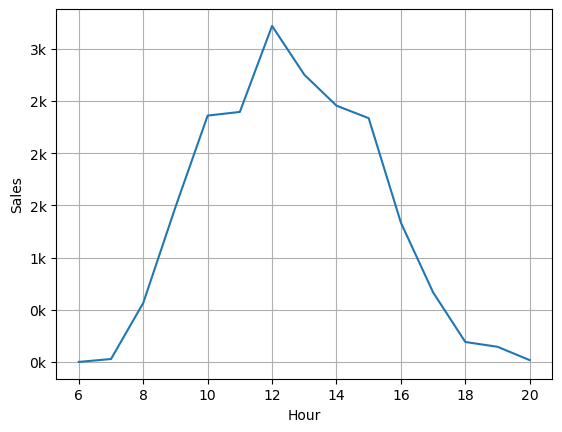

In [60]:
from matplotlib.ticker import StrMethodFormatter
plt.plot(invoice_hour['Hour'],invoice_hour['InvoiceNo']/1000)
plt.xlabel('Hour')
plt.ylabel('Sales')
plt.grid()
formatter = StrMethodFormatter('{x:.0f}k')
plt.gca().yaxis.set_major_formatter(formatter)
plt.show()

According to the data, the optimal timeframe for this e-commerce company to initiate advertising campaigns is around 12 PM, during which the highest sales are achieved. This may be linked to the increased availability of customers during their break times, making it more likely for them to use their mobile devices or computers during this period.

**6) what strategies can be applied to effectively segment customers for improved marketing and personalized experiences?**

**Customer Segmentation**
<br>In this case, we're gonna use the RFM analysis (Recency, Frequency and Monetary) is a technique used for customer segmentation based on their purchasing behaviour.

The term RFM comes from the function of three acronyms: Recency, Frequency, and Monetary, seeking to better understand the customer and verify when was his last purchase, how many times he has bought and how much he has spent with the company.

Recency(R) Days since the customer's last purchase, Frequency(F) Number of products bought by thecustomer, Monetarity(M) Totalspent on purchases

Customer Score:
<br>The customer score ranges from 1 to 5, where the higher this number, the better. This score is assigned for each acronym independently:
- The more recent the customer's purchase the higher the Recency (R) score.
- The more purchases the customer makes, the higher the Frequency score (F)
- The more the customer spends on purchases, the higher the score the customer will have Monetarity (M)
- This definition of each score can be given through inference, i.e. some business definition or by quintile

In [61]:
df.dtypes

InvoiceNo                 object
StockCode                 object
Description               object
Quantity                   int64
InvoiceDate       datetime64[ns]
UnitPrice                float64
CustomerID                object
Country                   object
Year                       int32
Month                      int32
Day                        int32
Hour                       int32
Total of Sales           float64
dtype: object

In [62]:
# Creating a new dataset for customer segmentation purpose
cs_df = df.copy()
cs_df['CustomerID'] = cs_df['CustomerID'].astype(object)
cs_df = cs_df[cs_df['CustomerID'] != 0]
cs_df = cs_df[cs_df['Total of Sales']>0]
cs_df = cs_df[cs_df['Quantity']>0]
cs_df.drop_duplicates(subset='InvoiceNo', inplace=True)

In [63]:
# Creating a new dataset for customer segmentation purpose
recent_day = cs_df['InvoiceDate'].max()
rfm = cs_df.groupby('CustomerID').agg({'InvoiceDate': lambda x:(recent_day - x.max()).days, 
                                    'InvoiceNo': 'nunique', 
                                    'Total of Sales': 'sum'})

In [64]:
# Renaming columns 
rfm.rename(columns={'InvoiceDate': 'Recency', 
                        'InvoiceNo': 'Frequency',
                        'Total of Sales': 'Monetary'}, inplace=True)
rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,1,77183.60
12347.0,1,7,163.16
12348.0,74,4,331.36
12349.0,18,1,15.00
12350.0,309,1,25.20


In [65]:
# Summary statistics of RFM values 
rfm.describe().round(1)

,Recency,Frequency,Monetary
count,4339.0,4339.0,4339.0
mean,91.5,4.6,309.0
std,100.0,22.9,3227.3
min,0.0,1.0,0.4
25%,17.0,1.0,17.7
50%,50.0,2.0,47.1
75%,141.0,5.0,130.2
max,373.0,1427.0,168471.2


In [66]:
# Building Recency Segment via quartile (Here, the lower, the better)
r_labels = range(4,0,-1)
r_quartiles = pd.qcut(rfm['Recency'], 4, labels=r_labels)
rfm = rfm.assign(R=r_quartiles.values).round(0)

In [67]:
# Building Frequency Segment via quartile
f_labels = range(1, 5)
f_bins = [0, 1, 2, 4, rfm['Frequency'].max()] 
f_quartiles = pd.cut(rfm['Frequency'], bins=f_bins, labels=f_labels, right=False)
rfm = rfm.assign(F=f_quartiles.values).round(0)

In [68]:
# Building Monetary Segment via custom bin edges
m_labels = range(1, 5)
m_bins = [0, 1, 2, 4,rfm['Monetary'].max()]
m_quartiles = pd.cut(rfm['Monetary'], bins=m_bins, labels=m_labels, right=False)
rfm = rfm.assign(M=m_quartiles.values).round(0)

rfm.head()

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
12346.0,325,1,77184.0,1,2,4
12347.0,1,7,163.0,4,4,4
12348.0,74,4,331.0,2,4,4
12349.0,18,1,15.0,3,2,4
12350.0,309,1,25.0,1,2,4


In [69]:
# Building RFM Segment 
def join_rfm(x): return str (x['R'])+str(x['F'])+str(x['M'])

rfm['RFM_Segment'] = rfm.apply(join_rfm, axis=1)
rfm['RFM_Score'] = rfm[['R', 'F', 'M']].sum(axis=1)
rfm.head()

C:\Users\Diva Azzahra\anaconda3\Lib\site-packages\pandas\core\arrays\base.py:485: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)


,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score
CustomerID,,,,,,,,
12346.0,325,1,77184.0,1,2,4,1.02.04.0,7
12347.0,1,7,163.0,4,4,4,4.04.04.0,12
12348.0,74,4,331.0,2,4,4,2.04.04.0,10
12349.0,18,1,15.0,3,2,4,3.02.04.0,9
12350.0,309,1,25.0,1,2,4,1.02.04.0,7


In [70]:
# Assigning custom labels to each customer according to his RFM Score 
def segment_me (df):
    if df['RFM_Score']==12: return 'Vip Customers'
    elif df['RFM_Score']<=10 and df['RFM_Score']>=8: return ' Regular Customers'
    elif df['RFM_Score']<=7 and df['RFM_Score']>=4: return 'Weak Customers'
    else: return 'Lost Customer'
    
    
rfm['Segment']=rfm.apply(segment_me, axis=1)
rfm.tail()

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score,Segment
CustomerID,,,,,,,,,
18281.0,180,1,5.0,1,2,4,1.02.04.0,7,Weak Customers
18282.0,7,2,38.0,4,3,4,4.03.04.0,11,Lost Customer
18283.0,3,16,67.0,4,4,4,4.04.04.0,12,Vip Customers
18287.0,42,3,80.0,3,3,4,3.03.04.0,10,Regular Customers
Unknown,0,1427,52540.0,4,NaN,4,4.0nan4.0,-9223372036854775800,Lost Customer


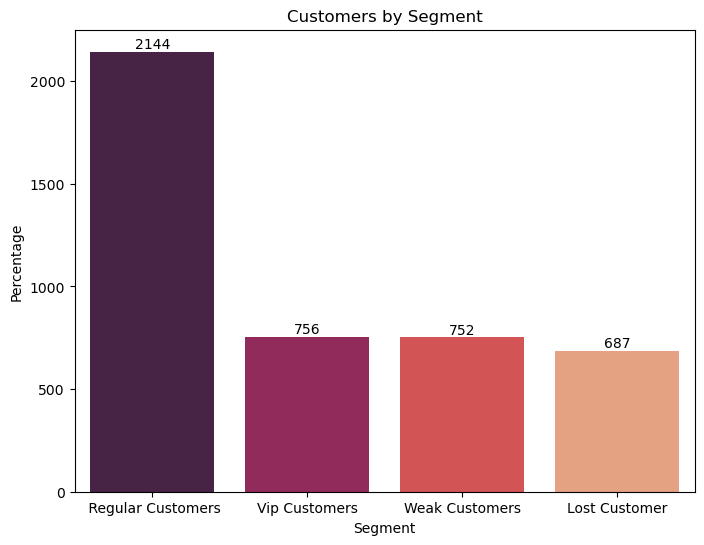

In [71]:
# Visualize the number of customers by segment 
segment_counts = rfm['Segment'].value_counts()
plt.figure(figsize=(8,6))
ax = sns.barplot(x=segment_counts.index, y=segment_counts.values, palette='rocket')
ax.bar_label(ax.containers[0])
plt.title('Customers by Segment')
plt.xticks(fontsize=10)
plt.xlabel('Segment')
plt.ylabel('Percentage')
plt.show()

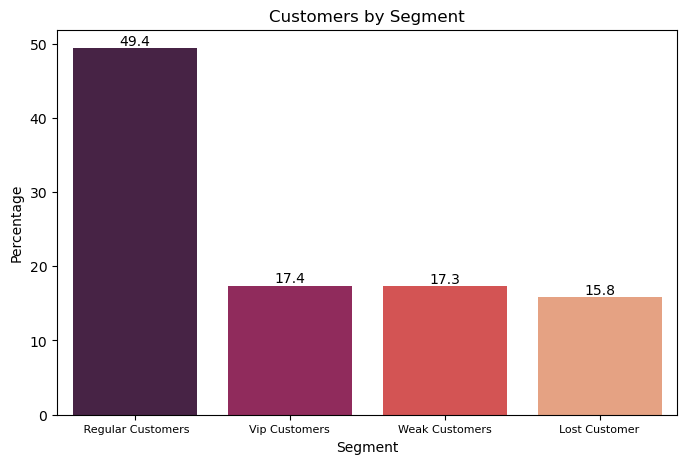

In [72]:
# Visualize the number of customers by segment 
segment_counts = rfm['Segment'].value_counts()
percentage = segment_counts / len(rfm) * 100
percentage = percentage.round(1)
plt.figure(figsize=(8,5))
ax = sns.barplot(x=segment_counts.index, y=percentage.values, palette='rocket')
ax.bar_label(ax.containers[0])
plt.title('Customers by Segment')
plt.xticks(fontsize=8)
plt.xlabel('Segment')
plt.ylabel('Percentage')
plt.show()

**Conclusion**
<br>In conclusion, our e-commerce customer segmentation analysis using RFM-based segmentation has provided valuable insights into the customer base.

**Regular Customers (49.4%)**: This is the largest segment, encompassing approximately 50% of our customer base. These "Regular Customers" engage in occasional purchases and contribute significantly to our revenue. They are the backbone of our business, and our goal should be to keep them engaged consistently.

**VIP Customers (17.4%)**: This segment consists of around 16% of our customers and is highly valuable. "VIP Customers" make frequent purchases throughout the year and spend generously. They represent the cream of our customer crop and should be treated with special care.

**Weak Customers (17.3%)**: Comprising about 17.8% of our customer base, there are approximately 756 "Weak Customers" who have made only 1 or 2 purchases. It's been a while since their last purchase. Targeted marketing efforts are crucial to potentially revive their interest and encourage more purchases.

**Lost Customers (15.8%)**: The "Lost Customers" category is home to those customers with the lowest RFM scores. These customers have made just one purchase, and their monetary contribution is the lowest across all segments. Additionally, they haven't made recent purchases, signifying their disengagement from our platform.

To leverage customer segmentation effectively, we should focus on tailored marketing strategies, customized promotions, and Enhanced customer experiences such as offering cashback, free shipping, and others . These efforts can reactivate dormant customers and establish long-term loyalty. Ultimately, our customer segmentation offers an opportunity to maximize engagement and, consequently, revenue.